In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv


--2025-06-25 14:53:27--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2025-06-25 14:53:27 (11.3 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", 	"Unnamed: 3",	"Unnamed: 4"], axis=1)

In [ ]:
df.columns = ['labels', 'data']

In [ ]:
df['target'] = df['labels'].map({'ham':0, 'spam':1})

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [ ]:
idx = 1
word2idx = {'<PAD>': 0}

In [ ]:
for i, row in df_train.iterrows():
  tokens =  row['data'].lower().split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx +=1


In [ ]:
word2idx

{'<PAD>': 0,
 'will': 1,
 'ì_': 2,
 'b': 3,
 'going': 4,
 'to': 5,
 'esplanade': 6,
 'fr': 7,
 'home?': 8,
 'teach': 9,
 'me': 10,
 'apps': 11,
 'da.': 12,
 'when': 13,
 'you': 14,
 'come': 15,
 'college.': 16,
 'shopping?': 17,
 'eh': 18,
 'ger': 19,
 'i': 20,
 'toking': 21,
 'abt': 22,
 'syd': 23,
 'leh...haha': 24,
 'not': 25,
 'really': 26,
 'dude,': 27,
 'have': 28,
 'no': 29,
 'friends': 30,
 "i'm": 31,
 'afraid': 32,
 ':(': 33,
 'friendship': 34,
 'poem:': 35,
 'dear': 36,
 'o': 37,
 'u': 38,
 'r': 39,
 'near': 40,
 'but': 41,
 'can': 42,
 'hear': 43,
 'dont': 44,
 'get': 45,
 'fear': 46,
 'live': 47,
 'with': 48,
 'cheer': 49,
 'more': 50,
 'tear': 51,
 'always': 52,
 'my': 53,
 'dear.': 54,
 'gud': 55,
 'ni8': 56,
 'like': 57,
 'a': 58,
 'personal': 59,
 'sized': 60,
 'or': 61,
 'what': 62,
 "i'll": 63,
 'let': 64,
 'know': 65,
 'it': 66,
 'kicks': 67,
 'in': 68,
 'tomarrow': 69,
 'final': 70,
 'hearing': 71,
 'on': 72,
 'laptop': 73,
 'case': 74,
 'so': 75,
 'cant.': 76,
 'wa

In [ ]:
len(word2idx)

10669

In [ ]:
train_sentences_as_int = []
for i, row in df_train.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens]
  train_sentences_as_int.append(sentence_as_int)

In [ ]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  test_sentences_as_int.append(sentence_as_int)

In [ ]:
len(train_sentences_as_int), len(test_sentences_as_int)

(3733, 1839)

In [ ]:
def data_generator(X, y, batch_size=32):
  X, y = shuffle(X,y)
  n_batches = int(np.ceil(len(y) / batch_size))
  for i in range(n_batches):
    end = min((i + 1) * batch_size, len(y))
    X_batch = X[i * batch_size:end]
    y_batch = y[i * batch_size:end]
    max_len = np.max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]

      pad = [0] * (max_len - len(x))
      X_batch[j] = pad + x

    X_batch = torch.from_numpy(np.array(X_batch)).long()
    y_batch = torch.from_numpy(np.array(y_batch)).long()

    yield X_batch, y_batch

for inputs, targets in data_generator(train_sentences_as_int, df_train.target):
  print("inputs", inputs, "shape", inputs.shape)
  break

for inputs, targets in data_generator(test_sentences_as_int, df_test.target):
  print("inputs", inputs, "shape", inputs.shape)
  break



inputs tensor([[   0,    0,    0,  ...,  113, 1130, 2315],
        [   0,    0,    0,  ...,  636, 1127, 4969],
        [   0,    0,    0,  ...,  531,    4, 5776],
        ...,
        [   0,    0,    0,  ...,   61,  122, 1855],
        [   0,    0,    0,  ...,  175, 7937, 2315],
        [   0,    0,    0,  ..., 4999, 1368, 5000]]) shape torch.Size([32, 32])
inputs tensor([[    0,     0,     0,     0,     0,     0,  2059,  2773,     5,   113,
            91,    10,   431,  7702,   115,   418,   254,    14,   646,   636,
          2059,     5,  1052,   624,  8958,  1459,  3952,   934,   951],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,   437,   971,  1780,   143],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  1016,    68,   572,    93,
           21

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
embed = nn.Embedding(len(word2idx), 20)
for inputs, targets in data_generator(train_sentences_as_int, df_train.target):
  out = embed(inputs)
  print("inputs", inputs, "shape", inputs.shape)
  print("outputs", out, "shape", out.shape)
  break

inputs tensor([[   0,    0,    0,  ...,  727,  782, 5727],
        [   0,    0,    0,  ...,  113,  175,  400],
        [   0,    0,    0,  ..., 2824,   14, 9637],
        ...,
        [   0,    0,    0,  ...,    1,   15, 4194],
        [   0,    0,    0,  ...,  195,   42, 1264],
        [   0,    0,    0,  ..., 1485, 1486, 1066]]) shape torch.Size([32, 40])
outputs tensor([[[ 0.7639, -0.9640, -0.1477,  ...,  0.0570,  0.1615,  1.6194],
         [ 0.7639, -0.9640, -0.1477,  ...,  0.0570,  0.1615,  1.6194],
         [ 0.7639, -0.9640, -0.1477,  ...,  0.0570,  0.1615,  1.6194],
         ...,
         [-1.5157,  0.3431,  0.5055,  ..., -0.9886, -1.0248,  0.5163],
         [ 0.5991,  0.9202,  0.0848,  ..., -0.1911,  2.2618,  0.4691],
         [ 0.9621, -0.8460,  1.5290,  ...,  0.1891, -0.0249,  0.5336]],

        [[ 0.7639, -0.9640, -0.1477,  ...,  0.0570,  0.1615,  1.6194],
         [ 0.7639, -0.9640, -0.1477,  ...,  0.0570,  0.1615,  1.6194],
         [ 0.7639, -0.9640, -0.1477,  ...,  0.05

In [ ]:
class CNN(nn.Module):
  def __init__(self, b_vocabs, n_inputs, k_outputs):
    super().__init__()
    self.V = b_vocabs
    self.D = n_inputs
    self.K = k_outputs

    self.embed = nn.Embedding(self.V, self.D)

    self.conv1 = nn.Conv1d(self.D, 32, 3, padding=1)
    self.pool1 = nn.MaxPool1d(2)
    self.conv2 = nn.Conv1d(32, 64, 3, padding=1)
    self.pool2 = nn.MaxPool1d(2)
    self.conv3 = nn.Conv1d(64, 128, 3, padding=1)

    self.fc = nn.Linear(in_features=128, out_features=self.K)

  def forward(self, X):

    out = self.embed(X)
    out = out.permute(0, 2, 1)

    out = self.conv1(out)
    out = F.relu(out)
    out = self.pool1(out)

    out = self.conv2(out)
    out = F.relu(out)
    out = self.pool2(out)

    out = self.conv3(out)

    out = out.permute(0, 2, 1)

    out, _ = torch.max(out, 1)

    out = self.fc(out)
    return out

In [ ]:
model = CNN(len(word2idx), 20,  1)
model.to(device)

CNN(
  (embed): Embedding(10669, 20)
  (conv1): Conv1d(20, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

train_gen = lambda: data_generator(train_sentences_as_int, df_train.target)
test_gen =  lambda: data_generator(test_sentences_as_int, df_test.target)

In [ ]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_gen():
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading

    test_loss = []
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, 15)

Epoch 1/15, Train Loss: 0.3253,       Test Loss: 0.2239, Duration: 0:00:00.539057
Epoch 2/15, Train Loss: 0.1797,       Test Loss: 0.1741, Duration: 0:00:00.481196
Epoch 3/15, Train Loss: 0.1230,       Test Loss: 0.1441, Duration: 0:00:00.509277
Epoch 4/15, Train Loss: 0.0889,       Test Loss: 0.1590, Duration: 0:00:00.543218
Epoch 5/15, Train Loss: 0.0647,       Test Loss: 0.1401, Duration: 0:00:00.403511
Epoch 6/15, Train Loss: 0.0434,       Test Loss: 0.1427, Duration: 0:00:00.388431
Epoch 7/15, Train Loss: 0.0276,       Test Loss: 0.1527, Duration: 0:00:00.391894
Epoch 8/15, Train Loss: 0.0182,       Test Loss: 0.1704, Duration: 0:00:00.404234
Epoch 9/15, Train Loss: 0.0105,       Test Loss: 0.2053, Duration: 0:00:00.395615
Epoch 10/15, Train Loss: 0.0137,       Test Loss: 0.1884, Duration: 0:00:00.404317
Epoch 11/15, Train Loss: 0.0106,       Test Loss: 0.1796, Duration: 0:00:00.400776
Epoch 12/15, Train Loss: 0.0048,       Test Loss: 0.1862, Duration: 0:00:00.383275
Epoch 13/15, 

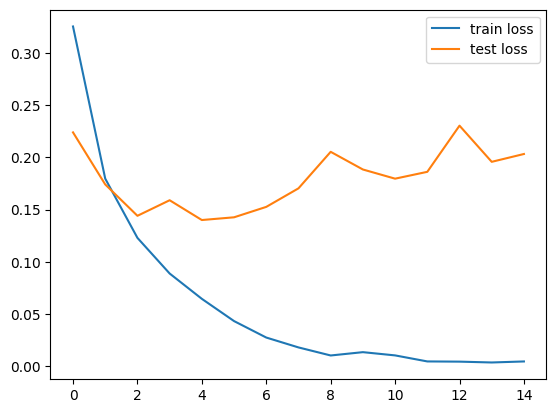

In [ ]:


# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()



In [ ]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9995, Test acc: 0.9603
